# Анализ продаж компьютерных игр.

**Задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании**

**1. Откроем файл с данными и изучите общую информацию**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
#df = pd.read_csv('C:/Users/Viktor/Downloads/games(1).csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [63]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm') #Посмотрим количество пропусков в %

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


In [64]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Изучив общую информацию, пришли к выводу, что в столбцах датафрейма имеются пропуски, не верный тип данных в user_score и Year_of_Release и название с разным регистром.**

**2. Подготовка данных. 
Заменим названия столбцов (приведите к нижнему регистру)**

In [65]:
new_columns = [column.lower() for column in df.columns]
display(new_columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [66]:
df.columns = new_columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Поменяем тип данных в year_of_release на datetime и user_score на float64**

In [67]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format = '%Y')
#df.info()

In [68]:
df.isna().sum() #Посмотрим количество пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Два пропуска в Name, возможно забыли заполнить название, необходимо удалить, т.к. мы не поймем о какой игре идет речь**

In [69]:
print(df['year_of_release'].unique())
print(df['critic_score'].unique())
print(df['user_score'].unique())
print(df['rating'].unique())

['2006-01-01T00:00:00.000000000' '1985-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '1989-01-01T00:00:00.000000000'
 '1984-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2010-01-01T00:00:00.000000000' '2013-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '1990-01-01T00:00:00.000000000'
 '1988-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2001-01-01T00:00:00.000000000' '2011-01-01T00:00:00.000000000'
 '1998-01-01T00:00:00.000000000' '2015-01-01T00:00:00.000000000'
 '2012-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '1992-01-01T00:00:00.000000000' '1997-01-01T00:00:00.000000000'
 '1993-01-01T00:00:00.000000000' '1994-01-01T00:00:00.000000000'
 '1982-01-01T00:00:00.000000000' '2016-01-01T00:00:00.000000000'
 '2003-01-01T00:00:00.000000000' '1986-01-01T00:00:00.000000000'
 '2000-01-01T00:00:00.000

**Посмотрели уникальные значения в столбцах в пропусками. В user_score заменити особенность - значение 'tbd'. скорее всего это ошибка или пропуски, заменим это знгачение на nan.**

In [70]:
def user_scores_not_tbd(wrong_user_scores, correct_user_score):
    df['user_score'] = df['user_score'].replace(wrong_user_scores, correct_user_score)
user_scores_not_tbd('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float64', errors='ignore')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


In [72]:
df.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True) # удадили пропуски 
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [73]:
df['rating'] = df['rating'].fillna('no_rating') #заменим пропуски в столбце rating на значение no_rating 

**Думаю пропуски в user_score, rating и critic_score могли получиться в результате технического сбоя, их трогать не будем, чтобы не искажать данные и последующий анализ.
Два пропуска в Name, возможно забыли заполнить название, необходимо удалить, т.к. мы не поймем о какой игре идет речь. Так же поступим с year_of_release и genre**

**Проверим пропуски после заполнения и удаления значений**

In [74]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец**

In [75]:
df['sales_sum'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#df.head()
print(df['sales_sum'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sales_sum, Length: 16444, dtype: float64


**3. Проведем исследовательский анализ данных**

**Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [76]:
game_of_year_pivot_table = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc=['count'])
game_of_year_pivot_table.columns = ['count'] 
display(game_of_year_pivot_table)


,count
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


<AxesSubplot:xlabel='year_of_release'>

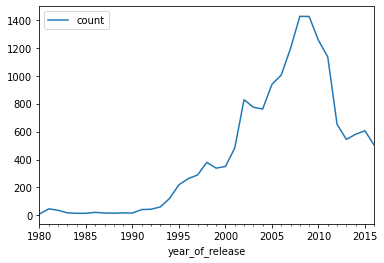

In [77]:
game_of_year_pivot_table.plot()

**До 1993 года количество игр было не большим, с развитием технологий стало повышаться и количество игр. Пик пришел на 2008-2009 года.
Я думаю важны данные за все периоды**

**Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [78]:
platform_sales_pivot_table = df.pivot_table( index = ['platform'], values='sales_sum', aggfunc = 'sum').sort_values(by='sales_sum', ascending=False)
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('sales_sum', ascending = False)
display(platform_sales_pivot_table) 

,sales_sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [79]:
#top_platform = platform_sales_pivot_table.head() #выведем 5ку лидеров продаж
top_platform = list(platform_sales_pivot_table.index[:6])
display(top_platform)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [80]:
for platform in top_platform:
    #display('Платформа ',platform)
    platform_sales_pivot_table = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='sales_sum', aggfunc='sum')
    display(platform_sales_pivot_table)

sales_sum
platform year_of_release           
PS2      2000-01-01           39.17
         2001-01-01          166.43
         2002-01-01          205.38
         2003-01-01          184.31
         2004-01-01          211.81
         2005-01-01          160.66
         2006-01-01          103.42
         2007-01-01           75.99
         2008-01-01           53.90
         2009-01-01           26.40
         2010-01-01            5.64
         2011-01-01            0.45

sales_sum
platform year_of_release           
X360     2005-01-01            8.25
         2006-01-01           51.62
         2007-01-01           95.41
         2008-01-01          135.26
         2009-01-01          120.29
         2010-01-01          170.03
         2011-01-01          143.84
         2012-01-01           99.74
         2013-01-01           88.58
         2014-01-01           34.74
         2015-01-01           11.96
         2016-01-01            1.52

sales_sum
platform year_of_release           
PS3      2006-01-01           20.96
         2007-01-01           73.19
         2008-01-01          118.52
         2009-01-01          130.93
         2010-01-01          142.17
         2011-01-01          156.78
         2012-01-01          107.36
         2013-01-01          113.25
         2014-01-01           47.76
         2015-01-01           16.82
         2016-01-01            3.60

sales_sum
platform year_of_release           
Wii      2006-01-01          137.15
         2007-01-01          152.77
         2008-01-01          171.32
         2009-01-01          206.97
         2010-01-01          127.95
         2011-01-01           59.65
         2012-01-01           21.71
         2013-01-01            8.59
         2014-01-01            3.75
         2015-01-01            1.14
         2016-01-01            0.18

sales_sum
platform year_of_release           
DS       1985-01-01            0.02
         2004-01-01           17.27
         2005-01-01          130.14
         2006-01-01          119.81
         2007-01-01          146.94
         2008-01-01          145.31
         2009-01-01          119.54
         2010-01-01           85.02
         2011-01-01           26.18
         2012-01-01           11.01
         2013-01-01            1.54

sales_sum
platform year_of_release           
PS       1994-01-01            6.03
         1995-01-01           35.96
         1996-01-01           94.70
         1997-01-01          136.17
         1998-01-01          169.49
         1999-01-01          144.53
         2000-01-01           96.37
         2001-01-01           35.59
         2002-01-01            6.67
         2003-01-01            2.07

In [81]:
print('Платформа ','PS4')
platform_sales_pivot_table = pd.pivot_table(df.query('platform == "PS4"'), 
                                            index=['platform','year_of_release'], 
                                            values='sales_sum', aggfunc='sum')
print(platform_sales_pivot_table)
print()

Платформа  PS4
                          sales_sum
platform year_of_release           
PS4      2013-01-01           25.99
         2014-01-01          100.00
         2015-01-01          118.90
         2016-01-01           69.25



**Популярные платформы используются 5-12 лет
Для платформ, которые пользуются популярностью, срок использования равен 8-12 лет. Можно проследить, как менялись поколения для приствок PS: PS 1994-2003, PS2 2000-2011, PS3 2006- 2016, PS4 2013-2016(данные только до 2016). Каждые 6-7 лет выходит новая платформа, но предыдущие платформы еще продаются 3 года.**

**Возьмем данные за актуальный период: 2015 - 2016 года. Период с начала создания платформы PS4. Эти данные помогут построить прогноз на 2017 год.**

In [82]:
actual_game = df.query('year_of_release > 2015') #выбрали данные за актуальный период

**Посмотрим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ**

In [83]:
actual_platform_pivot_table = actual_game.pivot_table(index = ['platform',], values = 'sales_sum', aggfunc=['sum'])
actual_platform_pivot_table['sum']
display(actual_platform_pivot_table)

,sum
,sales_sum
platform,
3DS,15.14
PC,5.25
PS3,3.60
PS4,69.25
PSV,4.25
Wii,0.18
WiiU,4.60
X360,1.52


**Лидеры продаж: PS4, XOne, 3DS**

**Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат**

count    502.000000
mean       0.258845
std        0.698041
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        7.600000
Name: sales_sum, dtype: float64

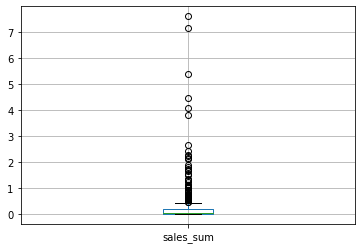

In [84]:
actual_game.boxplot(column = 'sales_sum')
actual_game['sales_sum'].describe()

(0.0, 0.5)

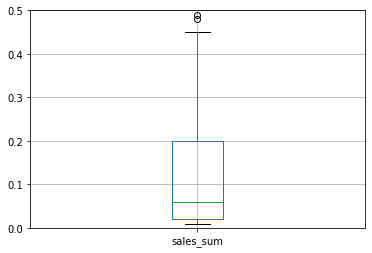

In [85]:
actual_game.boxplot(column = 'sales_sum')
plt.ylim(0, 0.5)

count    164.000000
mean       0.422256
std        0.968877
min        0.010000
25%        0.030000
50%        0.085000
75%        0.352500
max        7.600000
Name: sales_sum, dtype: float64

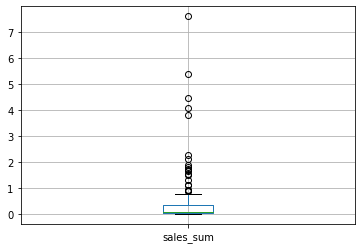

In [86]:
PS4_actual_game = actual_game.query('platform =="PS4"')
PS4_actual_game.boxplot(column = 'sales_sum')
PS4_actual_game['sales_sum'].describe()

(0.0, 1.0)

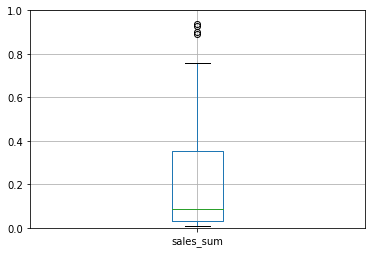

In [87]:
PS4_actual_game.boxplot(column = 'sales_sum')
plt.ylim(0, 1)

count    87.000000
mean      0.300575
std       0.549133
min       0.010000
25%       0.020000
50%       0.060000
75%       0.275000
max       2.650000
Name: sales_sum, dtype: float64

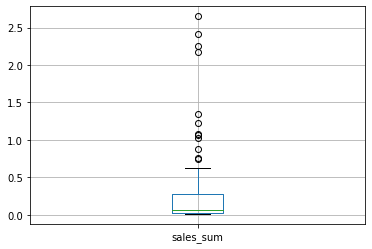

In [88]:
XOne_actual_game = actual_game.query('platform =="XOne"')
XOne_actual_game.boxplot(column = 'sales_sum')
XOne_actual_game['sales_sum'].describe()

(0.0, 0.8)

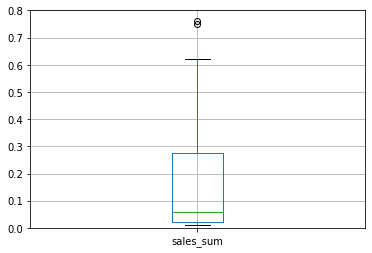

In [89]:
XOne_actual_game.boxplot(column = 'sales_sum')
plt.ylim(0, 0.8)

count    46.000000
mean      0.329130
std       1.058533
min       0.010000
25%       0.030000
50%       0.080000
75%       0.210000
max       7.140000
Name: sales_sum, dtype: float64

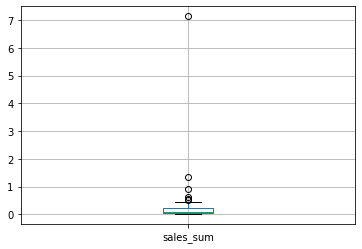

In [90]:
_3DS_actual_game = actual_game.query('platform =="3DS"')
_3DS_actual_game.boxplot(column = 'sales_sum')
_3DS_actual_game['sales_sum'].describe()

(0.0, 0.6)

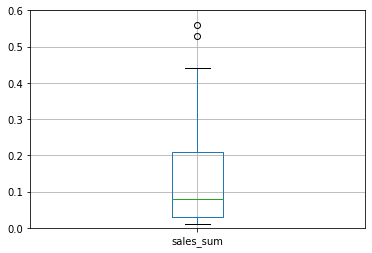

In [91]:
_3DS_actual_game.boxplot(column = 'sales_sum')
plt.ylim(0, 0.6)

**Продажи каждой игры не сильно отличаются за выбранный период.
Средняя выручка по всем играм: 200 тыс. Максимум 7.6 млн., 
Средняя выручка PS4: 352 тыс. Максимум 7,6 млн.
Средняя выручка XOne: 275 тыс. Максимум 2.6 млн.
Средняя выручка 3DS: 210 тыс. Максимум 7,1 млн.**

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**

In [92]:
score_PS4_actual_game = PS4_actual_game.loc[:,['sales_sum', 'critic_score', 'user_score']]
score_PS4_actual_game.head()

,sales_sum,critic_score,user_score
94,7.60,85.0,5.0
171,5.39,93.0,7.9
245,4.47,77.0,3.4
289,4.07,88.0,8.4
325,3.80,80.0,7.0


In [33]:
score_PS4_actual_game.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.375695,-0.122461
critic_score,0.375695,1.000000,0.480147
user_score,-0.122461,0.480147,1.000000


array([[<AxesSubplot:xlabel='sales_sum', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales_sum'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

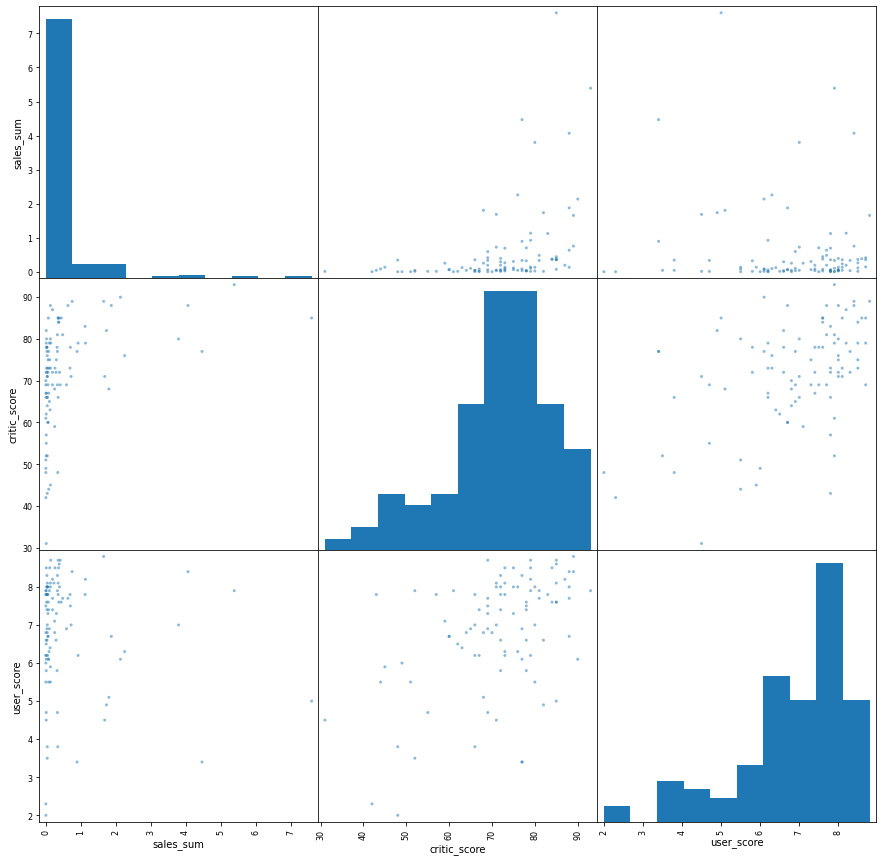

In [34]:
pd.plotting.scatter_matrix(score_PS4_actual_game, figsize=(15, 15))

**Есть прямая корреляция между продажами и рейтингом критиков. Отзывы пользователей никакой зависимост не имеют. Так же заметели, что на мнение пользователй влияет рейтинг критиков. То есть, чем выше оценка критика, тем выше оценит пользователь.**

**Соотнесем выводы с продажами игр на других платформах**

In [35]:
score_XOne_actual_game = XOne_actual_game.loc[:,['sales_sum', 'critic_score', 'user_score']]
score_XOne_actual_game.head()


,sales_sum,critic_score,user_score
571,2.65,84.0,5.5
640,2.42,78.0,3.1
709,2.25,87.0,8.2
758,2.17,80.0,6.9
1439,1.34,84.0,6.2


In [36]:
score_XOne_actual_game.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.412005,-0.130303
critic_score,0.412005,1.000000,0.426034
user_score,-0.130303,0.426034,1.000000


array([[<AxesSubplot:xlabel='sales_sum', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales_sum'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

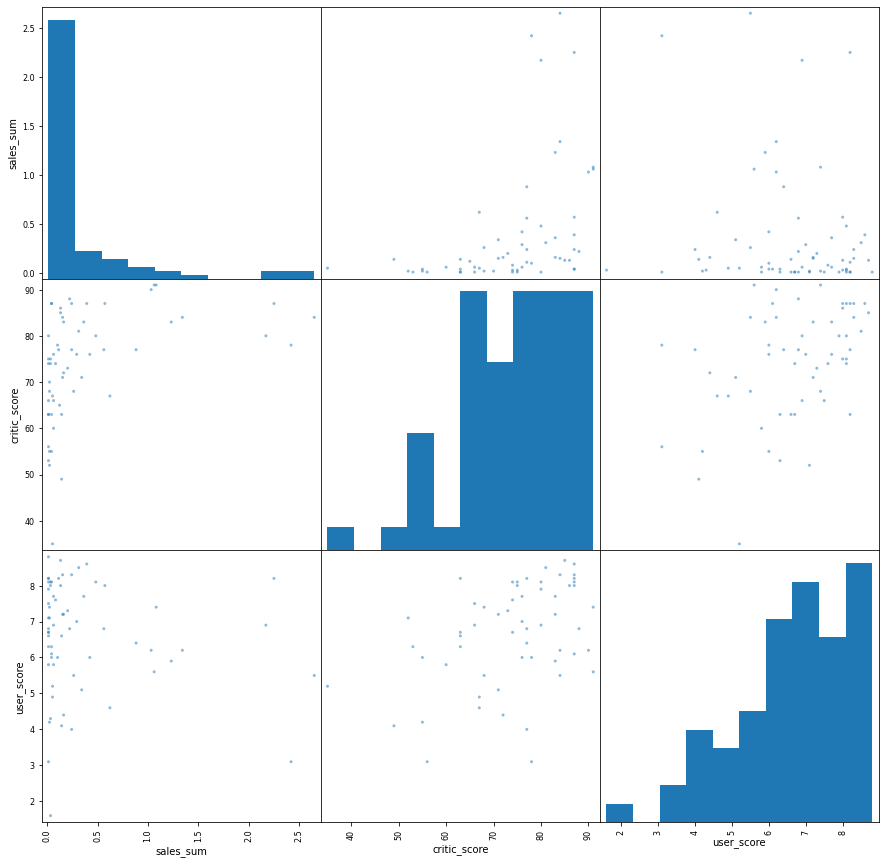

In [37]:
pd.plotting.scatter_matrix(score_XOne_actual_game, figsize=(15, 15))

**Для XOne тоже имеется зависимость продаж от оценки кртиков, оценки пользователей на продажи не влияют, но оценка пользователей зависит от оценки критиков(одно вытекает из другого)**

In [38]:
score_3DS_actual_game = _3DS_actual_game.loc[:,['sales_sum', 'critic_score', 'user_score']]
score_3DS_actual_game.head()

,sales_sum,critic_score,user_score
108,7.14,NaN,NaN
1466,1.33,NaN,NaN
2219,0.93,81.0,8.7
3177,0.63,NaN,NaN
3593,0.56,NaN,NaN


In [39]:
score_3DS_actual_game.corr()

,sales_sum,critic_score,user_score
sales_sum,1.000000,0.338408,0.373365
critic_score,0.338408,1.000000,0.721313
user_score,0.373365,0.721313,1.000000


array([[<AxesSubplot:xlabel='sales_sum', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sales_sum'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales_sum'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='sales_sum', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

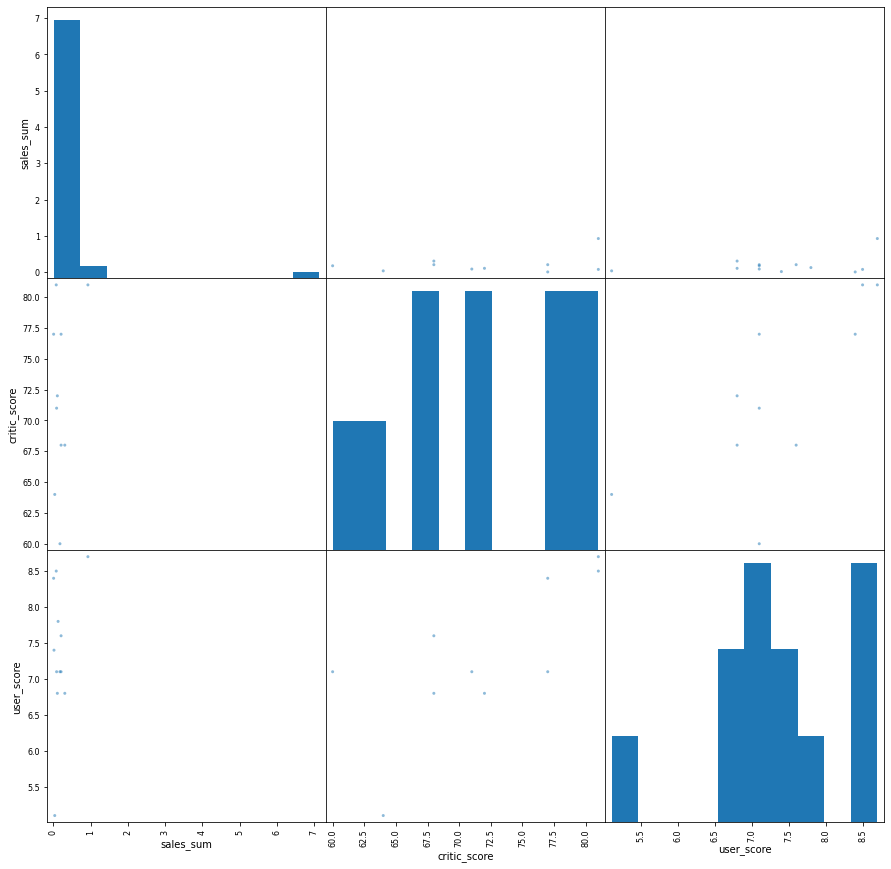

In [40]:
pd.plotting.scatter_matrix(score_3DS_actual_game, figsize=(15, 15))

**Продажи 3DS зависят от оценки и критиков и пользователей. Также высокая корреляция проследивается и оценки пользователей и оценки критиков, получается игроки верят критикам**

**Продажи PS4 и XOne зависят от оценки критиков, только у 3DS продажи зависят от рейтинга критиков и пользователей.**

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [41]:
genre_pivot_table = pd.pivot_table(actual_game, index = 'genre', values = 'sales_sum', aggfunc = 'sum')
genre_pivot_table.sort_values('sales_sum', ascending = False)

,sales_sum
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


**В топ самых популярных жанров вошли: Action, Shooter, Sports, Role-Playing - у них самые высокие продажи.
жанр Puzzle имеет самые низкие продажи**

**4. Составить портрет пользователя каждого региона**

In [42]:
#Самые популярные платформы для региона NA
pivot_table_na_sales = actual_game.pivot_table( index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
pivot_table_na_sales

,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36


In [43]:
#Самые популярные платформы для региона EA
pivot_table_ea_sales = actual_game.pivot_table( index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head()
pivot_table_ea_sales

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48


In [44]:
#Самые популярные платформы для региона JP
pivot_table_jp_sales = actual_game.pivot_table( index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head()
pivot_table_jp_sales

,jp_sales
platform,
3DS,8.03
PS4,5.74
PSV,3.56
PS3,1.30
WiiU,0.67


**Посмотрим популярность платформ на графике**

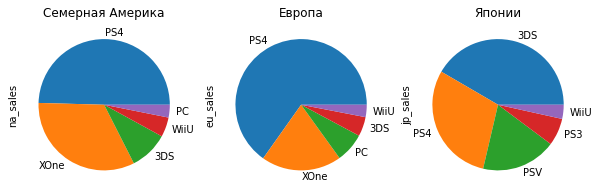

In [45]:
#Самые популярные платформы для регионов
fig = plt.figure()
 
ax1 = fig.add_subplot(131)
actual_game.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Cемерная Америка', figsize=(10, 10), ax=ax1);

ax2 = fig.add_subplot(132)
actual_game.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Европа', figsize=(10, 10), ax=ax2);

ax3 = fig.add_subplot(133)
actual_game.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Японии', figsize=(10, 10), ax=ax3);
 
plt.show()

**Посмотрели рейтинг топ 5 платформ. В Северной Америке и Европе самая популярная платформа PS4.
В японии лидтрующая платформа 3DS.**

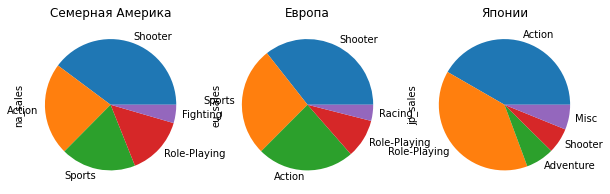

In [46]:
#Самые популярные жанры для регионов
fig = plt.figure()
 
ax1 = fig.add_subplot(131)
actual_game.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Cемерная Америка', figsize=(10, 10), ax=ax1);

ax2 = fig.add_subplot(132)
actual_game.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Европа', figsize=(10, 10), ax=ax2);

ax3 = fig.add_subplot(133)
actual_game.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head().plot(
    kind='pie', grid=True, title='Японии', figsize=(10, 10), ax=ax3);
 
plt.show()

**Вывели на графики 5 самых популярных жанров. В северной Америке и в Европе популярен жанр - Shooter, в Японии - Action и Role-Playing**

In [47]:
eu_platform_pivot_table = actual_game.pivot_table( index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_platform_pivot_table

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48


<AxesSubplot:xlabel='rating'>

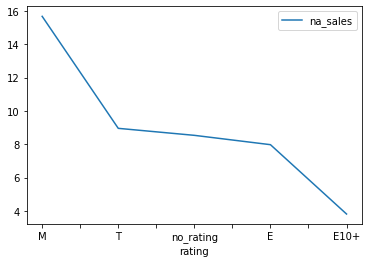

In [48]:
#Влияет ли рейтинг ESRB на продажи в Северной америке
pivot_table_na_rating = actual_game.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).plot()
pivot_table_na_rating

<AxesSubplot:xlabel='rating'>

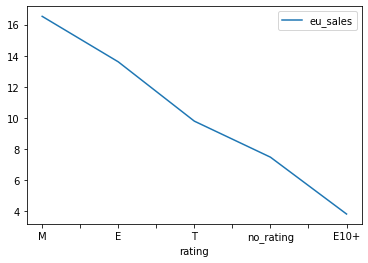

In [49]:
#Влияет ли рейтинг ESRB на продажи в Европе
pivot_table_eu_rating = actual_game.pivot_table(index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).plot()
pivot_table_eu_rating

<AxesSubplot:xlabel='rating'>

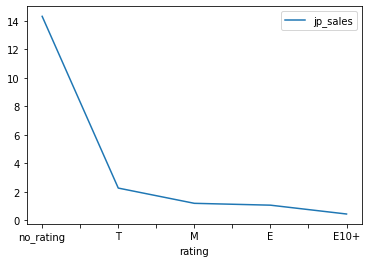

In [50]:
#Влияет ли рейтинг ESRB на продажи в Японии
pivot_table_jp_rating = actual_game.pivot_table(index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).plot()
pivot_table_jp_rating

**Судя по графикам рейтинг влияет на количество продаж в каждом регионе. В Северной Америке и Европе чаще преобретают видеоигры с рейтингом М (от 17 лет), а Японии продажи рейтинг Т (от 13 лет)**

**В Северной Америке и Европе ситуации схожие самая популярная платформа PS4, жанр Shooter а рейтинг игр 17+.А вот в Японии - популярен жанр Action и Role-Playing, платформа 3DS расчитанные на подростков**

**5. Проверка гипотез**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: Рейтинг пользователей (user_score) платформы "Xbox One" = Рейтингу пользователей (user_score) платформы "PC"
H_a: Рейтинг пользователей (user_score) платформы "Xbox One" ≠  Рейтингу пользователей (user_score) платформы "PC"
alpha = 0.05

In [51]:
df.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_sum
count,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [52]:
from scipy import stats as st

In [53]:
xbox_one= actual_game.loc[df['platform']=='XOne']['user_score'].dropna() 
pс = actual_game.loc[df['platform']=='PC']['user_score'].dropna() 

In [54]:
xbox_one.astype('float64', errors='ignore')
pс.astype('float64', errors='ignore')

3123     8.0
3771     6.8
4693     5.8
5000     7.6
5609     7.5
6753     7.3
6995     7.1
7778     3.2
8463     4.8
9292     3.0
9433     7.3
9798     7.9
9814     6.0
9955     4.2
10527    5.7
10963    4.3
11397    6.9
11450    8.0
11891    8.6
12368    4.4
12719    2.9
12834    8.2
12891    6.9
13259    7.5
13535    8.6
13744    8.0
14079    7.0
14081    3.5
14152    4.8
14339    6.1
14375    6.3
14400    8.7
14759    6.1
15407    3.7
15483    2.4
15489    8.5
16025    4.3
16110    6.2
16120    6.3
16201    6.8
16280    7.3
16337    7.1
16423    7.1
16463    6.8
16509    7.9
Name: user_score, dtype: float64

In [55]:
print('Средний пользовательские рейтинги платформ Xbox One:', xbox_one.mean())
print('Средний пользовательские рейтинги платформ  PC:', pс.mean())

Средний пользовательские рейтинги платформ Xbox One: 6.5984848484848495
Средний пользовательские рейтинги платформ  PC: 6.297777777777778


In [56]:
alpha = 0.05
results = results = st.ttest_ind(xbox_one, pс) # проверяем равенство двух независимых совокупностей. 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.33981967396516377
Не получилось отвергнуть нулевую гипотезу


**Значение рейтингов в общем похожи, это и подтверждает нулевая гипотеза**

**Средние рейтинги платформ PC и XOne отличаются.**

Средние пользовательские рейтинги жанров Action  и Sports разные
H_0: Рейтинг пользователей (user_score) жанров "Action" =  Рейтингу пользователей (user_score) жанра "Sports"
H_a: Рейтинг пользователей (user_score) жанров "Action" ≠   Рейтингу пользователей (user_score) жанра "Sports"
alpha = 0.05


In [57]:
action= actual_game.loc[df['genre']=='Action']['user_score'].dropna() 
sports = actual_game.loc[df['genre']=='Sports']['user_score'].dropna() 

In [58]:
action.astype('float64', errors='ignore')
sports.astype('float64', errors='ignore')

94       5.0
571      5.5
921      6.7
1007     4.9
1615     5.9
2024     6.2
2210     6.2
2782     3.3
3365     6.9
4358     7.6
4668     6.0
5010     1.7
5120     8.7
5444     5.8
5989     6.6
6487     5.5
6854     4.0
6891     8.3
8265     0.7
9132     4.1
9465     7.2
9629     2.0
9861     3.4
9955     4.2
9970     0.2
12834    8.2
12969    7.8
13384    6.1
13729    6.8
14098    6.5
14152    4.8
15227    4.5
15407    3.7
15839    6.0
16015    7.1
16120    6.3
16643    6.6
Name: user_score, dtype: float64

In [59]:
print('Средний пользовательские рейтинги жанров Action:', action.mean())
print('Средний пользовательские рейтинги жанров Sports:', sports.mean())

Средний пользовательские рейтинги жанров Action: 6.638823529411765
Средний пользовательские рейтинги жанров Sports: 5.4324324324324325


In [60]:
alpha = 0.05
results = results = st.ttest_ind(action,sports, equal_var = False) # проверяем равенство двух независимых совокупностей. 
print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.002025023028063322
Отвергаем нулевую гипотезу


**Рейтинги жанров отличаются, это и подтверждает альтернативная гипотеза**


    
**В ходе работы мы:**
    
   Проанализировали полученный датафрейм, нашли пропуски и аномалии. Выполнили переработку данных, заполнили пусые значения (где возможно), изменили типы данных, подготовили актуальные данные, проверили гипотезы.
    
    
**В результате**:
    
    Определили самые популярные платформы и жанры и популярные врзврастные категории игр. Выяснили, что продажа компьютерных игр зависит от жанра, платформы. Так же заметили, что популярны компании, которые давно разрабатывают игры. Все потому, что они изучили потребности пользователей, и знают, что понраиться пользователем.
    
 **Критерии успешности игр**:

Самые популярные игры-  PS4, XOne и 3DS.
Популярная платформа - PC.
Самые популярные жанры - Action, Shooter, Sports.
Болььшая часть пользователей исполььзуют игры категории 17+
Пользователи доверяют рейтигку критиков**